In [86]:
%matplotlib inline
"""
Define a suite a tests for the deviation calculations.
"""
import pandas as pd
import numpy as np
import os

import pylab as plt

# Some globals.
DNAME = "../data/Well_Surveys_Projected_to_TD.csv"


def nrmse(measured, actual):
    
    range = np.max(actual) - np.min(actual)
    if range == 0:
        return 0
    else:
        return np.sqrt(((measured - actual) ** 2).mean())/(np.max(actual) - np.min(actual))


def compare_curve(new_curve, true_curve):

    return nrmse(new_curve, true_curve)


def tan_method(md, inc, azi):
    
    azi_r = np.deg2rad(azi)
    inc_r = np.deg2rad(inc)

    northing = np.cumsum((md[1:] - md[:-1]) * np.sin(inc_r[1:]) * np.cos(azi_r[1:]))
    northing = np.insert(northing, 0, 0)

    easting = np.cumsum((md[1:] - md[:-1]) * np.sin(inc_r[1:]) * np.sin(azi_r[1:]))
    easting = np.insert(easting, 0, 0)
    
    tvd = np.cumsum((md[1:] - md[:-1]) * np.cos(inc_r[1:]))
    tvd = np.insert(tvd, 0, 0)

    return tvd, northing, easting


      1: North = SUM ((MD2 - MD1) * Sin WD2 * Cos HAZ2)
      2: East = SUM ((MD2 - MD1) * Sin WD2 * Sin HAZ2)
      3: TVD = SUM ((MD2 - MD1) * Cos WD2)

In [73]:
true_df = pd.read_csv(
    DNAME, header=4, skipfooter=3, index_col=False, engine="python"
).dropna(axis=1)

# true_data = {'MD[m]': [0, 10, 20, 30, 40],
#              'Inc[deg]': [0, 10, 10, 10, 10],
#              'Azi[deg]': [0, 0, 0, 0, 0],
#              'North[m]': [0.0, 1.7, 3.5, 5.2, 6.9],
#              'East[m]': [0.0, 0.0, 0.0, 0.0, 0.0],
#              'TVD[m]': [0.0, 9.8, 19.7, 29.5, 39.4]}

# true_df = pd.DataFrame(true_data)

md = true_df["MD[m]"].values
inc = true_df["Inc[deg]"].values
azi = true_df["Azi[deg]"].values

true_northing = true_df['North[m]']
true_easting = true_df['East[m]']
true_tvd = true_df['TVD[m]']

tvd, northing, easting = tan_method(md, inc, azi)

print('TVD Error: ', compare_curve(tvd, true_tvd))
print("North Error: ", compare_curve(northing, true_northing))
print('East Error: ', compare_curve(easting, true_easting))

assert np.allclose(tvd, true_tvd, rtol=1e-2)

TVD Error:  0.0009505039047772021
North Error:  0.007532276484959757
East Error:  0.0070379234492209805


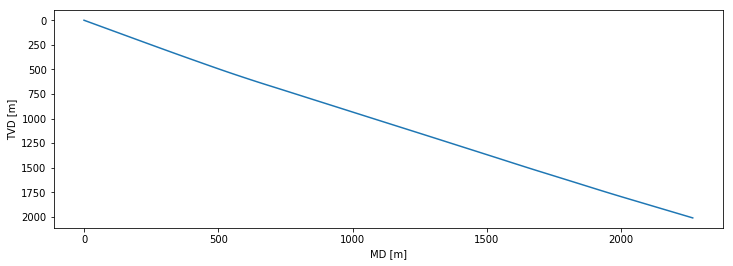

In [81]:
fig = plt.figure(figsize=(12,4))
plt.plot(md, tvd)

plt.gca().invert_yaxis()

plt.xlabel('MD [m]')
plt.ylabel('TVD [m]')
plt.show()

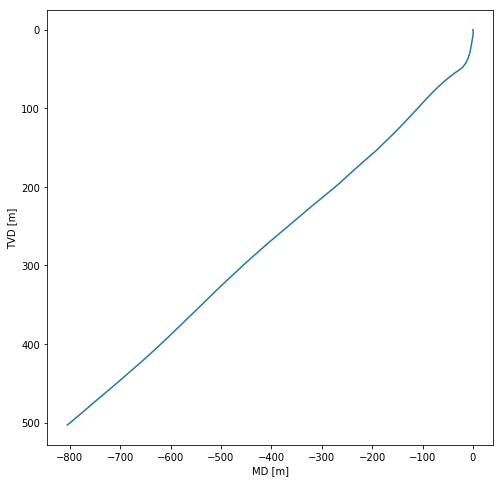

In [82]:
fig = plt.figure(figsize=(8,8))
plt.plot(easting, northing)

plt.gca().invert_yaxis()

plt.xlabel('MD [m]')
plt.ylabel('TVD [m]')
plt.show()

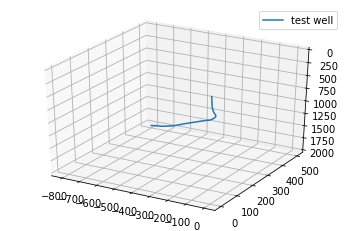

In [89]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(easting, northing, tvd, label='test well')
ax.invert_zaxis()
ax.legend()
